### Summary
- Read the data (csv files)

- Visualize : 
    - Head() to have a glance of data
    - Check the skewness => Normalize the data 
    - Check outliers 
    - View the distribution ( Q1,Q50, Q99...)
    
- Apply feature engineering 
    - Fill NaN (by mean, median, the most popular value)
    - Cut the outlier (quantile)

- Normalization:
    - LabelEncoder (normalize the label)
    - Min-max scaler the features 
    - Log scaler the target 
    
- Decrease dimensions:
    - Drop unimportance columns if any (low variance, uni-value, weak correlation with target and others)
    - Apply PCA 
    
- Decrease the data 
    - Binary feaure / one hot encoder
    - Remove randomly the data by 10% ? - Don't do

- Fit the model 
    - Model chosen: Random Forest, Boost (GradientBoostingRegressor, xboost), LightGBM, Elastic Net Regression, Ridge, 
    - Cross-validation 
    - Average model 
    
- Extract the result to submission file 

In [31]:
#import some necessary librairies
import pandas as pd #for dataframe treatement
import numpy as np #for array treatment
import seaborn as sns #for visualization 
import  matplotlib.pyplot as plt #Using matlab style
from scipy.stats import norm #for statistic
from sklearn.preprocessing import StandardScaler #for PCA 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split # For cross validation 

### Some kernels 
import xgboost as xgb 
from xgboost.sklearn import XGBClassifier

#Set some default values
sns.set(rc={"figure.figsize": (9, 6)})
pd.set_option("display.float_format", lambda x: '{:.3f}'.format(x))

# 4/dgCHYH-ZRfwLp9MV7wM3XUpcFCBq8IA0ALccIGATjsuAb4Y76So7SNA

In [32]:
#Read input files , pay attention in upcase and lowcase
train = pd.read_csv(r'C:\Users\lenovo\Downloads\House-Prices-Competition-master\House-Prices-Competition-master\train.csv')
test = pd.read_csv(r'C:\Users\lenovo\Downloads\House-Prices-Competition-master\House-Prices-Competition-master\test.csv')


print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


## Data exploration

In [33]:
##display the first five rows of the train dataset.
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 **There are many NaN values. Let's check the numerical and categories value**

In [34]:
train.describe().head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000


**==> There are 38 numerical features out of 81  => The categorical features are more many.**

In [35]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**==> There are 38 numerical features out of 81 in the test set
 Save the data for before feature engineering **



### Check skweness 
* train set

In [36]:
numeric_feature =train.select_dtypes(include=[np.number])
#numeric_feature.apply(lambda x: var_summary(x)).T
i = 0 
temp = pd.DataFrame()
for c in numeric_feature: 
  feat = numeric_feature[c].skew()
  if feat >=1.5:
    print ("%s            : %f" % (c,feat))
    temp.loc[:,c] = numeric_feature[c]
    i+=1
print ("Total: ", i)

LotFrontage            : 2.163569
LotArea            : 12.207688
MasVnrArea            : 2.669084
BsmtFinSF1            : 1.685503
BsmtFinSF2            : 4.255261
TotalBsmtSF            : 1.524255
LowQualFinSF            : 9.011341
BsmtHalfBath            : 4.103403
KitchenAbvGr            : 4.488397
WoodDeckSF            : 1.541376
OpenPorchSF            : 2.364342
EnclosedPorch            : 3.089872
3SsnPorch            : 10.304342
ScreenPorch            : 4.122214
PoolArea            : 14.828374
MiscVal            : 24.476794
SalePrice            : 1.882876
Total:  17


** Many features are skewed.**



*   ==> 1/ When filling the NaN, choose median instead of mean
*   ==> 2/ Need to normalize them before fitting


### Check distribution


In [37]:
def var_summary(x):
    return pd.Series([x.min(),x.quantile(0.01),x.quantile(0.05),x.quantile(0.10),x.quantile(0.50),x.quantile(0.75),x.quantile(0.95),x.quantile(0.99),x.max()],index=["Min","Q1","Q5","Q10","Q50","Q75","Q95","Q99","Max"])

In [38]:
numeric_feature.apply(lambda x: var_summary(x)).T

,Min,Q1,Q5,Q10,Q50,Q75,Q95,Q99,Max
Id,1.000,15.590,73.950,146.900,730.500,1095.250,1387.050,1445.410,1460.000
MSSubClass,20.000,20.000,20.000,20.000,50.000,70.000,160.000,190.000,190.000
LotFrontage,21.000,21.000,34.000,44.000,69.000,80.000,107.000,141.000,313.000
LotArea,1300.000,1680.000,3311.700,5000.000,9478.500,11601.500,17401.150,37567.640,215245.000
OverallQual,1.000,3.000,4.000,5.000,6.000,7.000,8.000,10.000,10.000
OverallCond,1.000,3.000,4.000,5.000,5.000,6.000,8.000,9.000,9.000
YearBuilt,1872.000,1899.180,1916.000,1924.900,1973.000,2000.000,2007.000,2009.000,2010.000
YearRemodAdd,1950.000,1950.000,1950.000,1950.000,1994.000,2004.000,2007.000,2009.000,2010.000
MasVnrArea,0.000,0.000,0.000,0.000,0.000,166.000,456.000,791.920,1600.000
BsmtFinSF1,0.000,0.000,0.000,0.000,383.500,712.250,1274.000,1572.410,5644.000


**
- Outliers: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF, GrLivArea, LowQualFinSF, OpenPorchSF, 3SsnPorch, ScreenPorch, MiscVal
- Remove PoolArea 
** 

### Check correlation

In [39]:
corr = numeric_feature.corr()

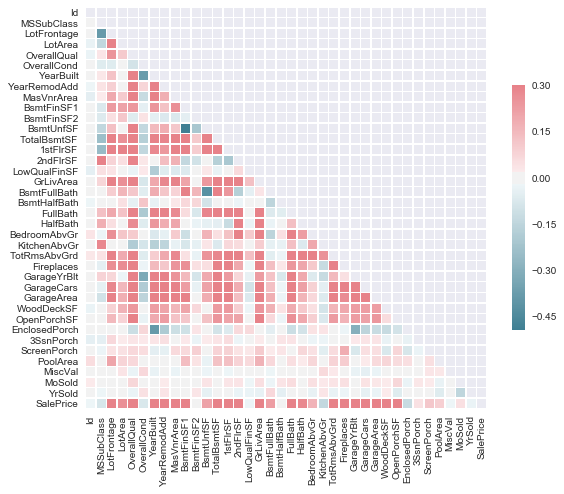

In [40]:
#Visualize the correlation 

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(9,9))

# Generate a ustom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

** No strong correlation **
- Remove OpenPorchSF, 3SsnPorch, ScreenPorch, EnclosedPorch	

### Concat the train and test set for further using 

In [41]:
# Save the ID for later use
test_Id = test["Id"]
%store test_Id
train_Id = train["Id"]

# Drop ID because it's not useful. 
train = train.drop(["Id"],axis=1)
test = test.drop(["Id"],axis=1)

#Count number of rows of train and test set
ntrain = train.shape[0]
ntest = test.shape[0]

# Move SalePrice column in training set to target value (y_train)
y_train = train.SalePrice.values
train = train.drop(["SalePrice"],axis=1)
%store ntrain

Stored 'test_Id' (Series)
Stored 'ntrain' (int)


In [42]:
print(y_train.shape)

(1460,)


In [43]:
train_test_concat = pd.concat((train,test)).reset_index(drop=True)

#Print to verify 
print(train.shape)
print(test.shape)
print(train_test_concat.shape)

(1460, 79)
(1459, 79)
(2919, 79)


In [44]:
# Visualize features having few values 
for c in train_test_concat:
    y = train_test_concat[c].value_counts(dropna=False)
    if y.count() < 4: 
      print( y)
    

Pave    2907
Grvl      12
Name: Street, dtype: int64
NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64
AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
Y    2723
N     196
Name: CentralAir, dtype: int64
0    1834
1    1060
2      25
Name: HalfBath, dtype: int64
Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64


** ==> Drop Street and Utilities which are low variance

## Feature engineering
* Missing values 
    * Remove row with too many null value - consider correlation before 
    * Fill value with Median, None, the most popular category value
* Reduce dimension
* Add new features

In [45]:
#Only 1 values => remove 
train_test_concat = train_test_concat.drop(['Utilities'], axis=1)
train_test_concat = train_test_concat.drop(['Street'], axis=1)
train_test_concat = train_test_concat.drop(['OpenPorchSF'], axis=1)
train_test_concat = train_test_concat.drop(['3SsnPorch'], axis=1)
train_test_concat = train_test_concat.drop(['ScreenPorch'], axis=1)
train_test_concat = train_test_concat.drop(['EnclosedPorch'], axis=1)
train_test_concat = train_test_concat.drop(['PoolArea'], axis=1)

In [46]:
#Count the duplicate
train.duplicated().sum()
test.duplicated().sum()

0

In [47]:
#counting null values 
null_value=train.isnull().sum() / len(train) *100
null_value=null_value.sort_values(ascending=False)

null_value.head(20)

PoolQC         99.521
MiscFeature    96.301
Alley          93.767
Fence          80.753
FireplaceQu    47.260
LotFrontage    17.740
GarageCond      5.548
GarageType      5.548
GarageYrBlt     5.548
GarageFinish    5.548
GarageQual      5.548
BsmtExposure    2.603
BsmtFinType2    2.603
BsmtFinType1    2.534
BsmtCond        2.534
BsmtQual        2.534
MasVnrArea      0.548
MasVnrType      0.548
Electrical      0.068
LotConfig       0.000
dtype: float64

In [48]:
for col in ("PoolQC","MiscFeature","Alley"):
    train_test_concat[col]=train_test_concat[col].fillna("None")


In [49]:
#Fence 
train_test_concat.Fence = train_test_concat.Fence.fillna("None")

In [50]:
#FireplaceQu
train_test_concat.FireplaceQu = train_test_concat.FireplaceQu.fillna("None")

In [51]:
#LotFrontage - Numerical -> Fill by median is usually more exact than mean 
train_test_concat.LotFrontage = train_test_concat.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [52]:
#No garage 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_test_concat[col]=train_test_concat[col].fillna("None")

In [53]:
#No garage 
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_test_concat[col]=train_test_concat[col].fillna(0)

In [54]:
#No basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_test_concat[col] = train_test_concat[col].fillna(0)

In [55]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test_concat[col] = train_test_concat[col].fillna('None')

In [56]:
train_test_concat["MasVnrType"] = train_test_concat["MasVnrType"].fillna("None")
train_test_concat["MasVnrArea"] = train_test_concat["MasVnrArea"].fillna(0)

In [57]:
#==> Fill by the most polpular category
train_test_concat["MSZoning"] = train_test_concat["MSZoning"].fillna(train_test_concat['MSZoning'].mode()[0])

In [58]:
#==> Fille the missing with the most polpular category
train_test_concat["Functional"] = train_test_concat["Functional"].fillna(train_test_concat['Functional'].mode()[0])

In [59]:
train_test_concat['Electrical'] = train_test_concat['Electrical'].fillna(train_test_concat['Electrical'].mode()[0])

In [60]:
train_test_concat['KitchenQual'] = train_test_concat['KitchenQual'].fillna(train_test_concat['KitchenQual'].mode()[0])

In [61]:
train_test_concat['Exterior1st'] = train_test_concat['Exterior1st'].fillna(train_test_concat['Exterior1st'].mode()[0])
train_test_concat['Exterior2nd'] = train_test_concat['Exterior2nd'].fillna(train_test_concat['Exterior2nd'].mode()[0])

In [62]:
train_test_concat['SaleType'] = train_test_concat['SaleType'].fillna(train_test_concat['SaleType'].mode()[0])

In [63]:
train_test_concat['MSSubClass'] = train_test_concat['MSSubClass'].fillna("None")

In [64]:
#Verify if there is missing values 
print(train_test_concat.isnull().sum().sort_values(ascending=False).head())

SaleCondition    0
SaleType         0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64


### Return to train set and test set 

### Cut outliers

In [65]:
train = train_test_concat[:ntrain]
test = train_test_concat[ntrain:]

In [66]:
train.shape

(1460, 72)

In [67]:
test.shape

(1459, 72)

In [68]:
#Cut outlier of train dataset 1stFlrSF, 2ndFlrSF, BsmtFinSF1, BsmtUnfSF, GrLivArea, LotArea, MiscVal, TotalBsmtSF 
train['LotArea']= train['LotArea'].clip_upper(train["LotArea"].quantile(0.99)) 
train['MiscVal']= train['MiscVal'].clip_upper(train["MiscVal"].quantile(0.99)) 
train['MasVnrArea']= train['MasVnrArea'].clip_upper(train["MasVnrArea"].quantile(0.99)) 
train['LotFrontage']= train['LotFrontage'].clip_upper(train["LotFrontage"].quantile(0.99)) 
train['LowQualFinSF']= train['LowQualFinSF'].clip_upper(train["LowQualFinSF"].quantile(0.99)) 
train['BsmtFinSF1']= train['BsmtFinSF1'].clip_upper(train["BsmtFinSF1"].quantile(0.99)) 
train['BsmtFinSF2']= train['BsmtFinSF2'].clip_upper(train["BsmtFinSF2"].quantile(0.99)) 
train['GrLivArea']= train['GrLivArea'].clip_upper(train["GrLivArea"].quantile(0.99)) 
train['1stFlrSF']= train['1stFlrSF'].clip_upper(train["1stFlrSF"].quantile(0.99)) 
train['TotalBsmtSF']= train['TotalBsmtSF'].clip_upper(train["TotalBsmtSF"].quantile(0.99)) 
train['LotArea']= train['LotArea'].clip_upper(train["LotArea"].quantile(0.99)) 
      
    
#test set LotArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea,GarageArea, WoodDeckSF, MiscVal
test['LotArea']= test['LotArea'].clip_upper(test["LotArea"].quantile(0.75)) 
test['MiscVal']= test['MiscVal'].clip_upper(test["MiscVal"].quantile(0.85)) 
test['BsmtFinSF1']= test['BsmtFinSF1'].clip_upper(test["BsmtFinSF1"].quantile(0.99)) 
test['BsmtFinSF2']= test['BsmtFinSF2'].clip_upper(test["BsmtFinSF2"].quantile(0.99)) 
test['BsmtUnfSF']= test['BsmtUnfSF'].clip_upper(test["BsmtUnfSF"].quantile(0.99)) 
test['TotalBsmtSF']= test['TotalBsmtSF'].clip_upper(test["TotalBsmtSF"].quantile(0.99)) 
test['1stFlrSF']= test['1stFlrSF'].clip_upper(test["1stFlrSF"].quantile(0.99)) 
test['2ndFlrSF']= test['2ndFlrSF'].clip_upper(test["2ndFlrSF"].quantile(0.99)) 
test['GrLivArea']= test['GrLivArea'].clip_upper(test["GrLivArea"].quantile(0.99)) 
test['GarageArea']= test['GarageArea'].clip_upper(test["GarageArea"].quantile(0.99)) 
test['WoodDeckSF']= test['WoodDeckSF'].clip_upper(test["WoodDeckSF"].quantile(0.99)) 

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [69]:
train_test_concat = pd.concat((train,test)).reset_index(drop=True)

### Normalize with scaler

In [70]:
#print(train_test_concat.isnull().sum().sort_values(ascending=False).head())

In [71]:
import sys
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_feats = train_test_concat.select_dtypes(include=[np.number])
cat_feats = train_test_concat.select_dtypes(exclude =[np.number])
numeric_feats_norm = pd.DataFrame(data=scaler.fit_transform(numeric_feats),columns=numeric_feats.columns)
train_test_concat_norm = pd.merge(numeric_feats_norm,cat_feats,left_index=True, right_index=True)        

In [72]:
print(numeric_feats_norm.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [73]:
print(train_test_concat_norm.shape)
print(train_test_concat_norm.shape)

(2919, 72)
(2919, 72)


### Next: - 

In [74]:
#Convert category feature into 0,1

from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_test_concat_norm[c].values)) 
    train_test_concat_norm[c] = lbl.transform(list(train_test_concat_norm[c].values))

# shape        
print('Shape all_data: {}'.format(train_test_concat.shape))

Shape all_data: (2919, 72)


In [75]:
train_test_concat_norm = pd.get_dummies(train_test_concat_norm)
print(train_test_concat_norm.shape)

(2919, 214)


### Scaler the target

In [76]:
#Sale Price - Target
%matplotlib inline
#plt.figure(num=None, figsize=(6, 4))
#sns.distplot(y_train, fit=norm)

In [77]:
# Scaler / log the target
#plt.figure(num=None, figsize=(6, 4))
y_train = np.log(y_train)
#sns.distplot(y_train, fit=norm)

In [78]:
print(y_train)
%store y_train

[12.24769432 12.10901093 12.31716669 ... 12.49312952 11.86446223
 11.90158345]
Stored 'y_train' (ndarray)


In [79]:
%store train_test_concat_norm

Stored 'train_test_concat_norm' (DataFrame)
